In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np
import pandas as pd
import keras
import sklearn
from sklearn import linear_model, decomposition
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

2023-12-22 14:24:18.213906: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 14:24:18.245214: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 14:24:18.245239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 14:24:18.246176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 14:24:18.251387: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 14:24:18.251728: I tensorflow/core/platform/cpu_feature_guard.cc:1

Prepare data for transform

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
np.random.shuffle(X_train)
X_train = X_train[:1000].reshape((1000, 784))

model = sklearn.decomposition.PCA()
model.fit(X_train, y_train)
X_train_pca = model.transform(X_train)

Extract vector components and reconstruct some images

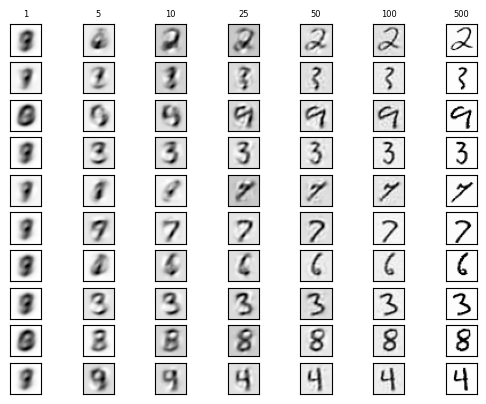

In [3]:
components = [1, 5, 10, 25, 50, 100, 500]
rows = 10
res = []
for r in range(rows):
    for c in components:
        res.append([r, c])

fig, axes = plt.subplots(rows, len(components))

for i, ((pic, cmp), ax) in enumerate(zip(res, axes.flatten())):
    X_train_pca = model.transform(X_train)
    X_train_pca[:, cmp:] = 0.0
    X_train_transformed = model.inverse_transform(X_train_pca)
    ax.imshow(X_train_transformed[pic].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i <= 6:
        ax.set_title(cmp, fontdict={'fontsize': 6})

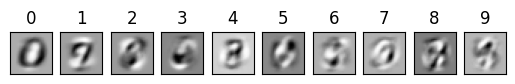

In [23]:
fig, axes = plt.subplots(1, 10)
for i, ax in enumerate(axes):
    ax.imshow(model.components_[i].reshape((28, 28)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(i)